In [1]:
from openff.toolkit import ForceField, Molecule, Topology

topology = Topology.from_pdb(
    "../pdb/complex-bespoke.pdb",
    unique_molecules=[Molecule.from_file("../sdf/lig_CAT-13a.sdf")],
)

force_field = ForceField(
    "../offxml/openff-2.0.0_bespoke_cat13a.offxml",
    "ff14sb_off_impropers_0.0.3.offxml",
)

interchange = force_field.create_interchange(topology)

In [2]:
from openmm_utils import run_openmm

# This takes aobut a minute to run
run_openmm(interchange, 200, "preview.dcd")

In [3]:
from viz import visualize_protein_ligand

visualize_protein_ligand("preview.dcd", topology)

NGLWidget(max_frame=76)

What happened here?

A lot! But most of the heavy lifting is done under the hood by the OpenFF Toolkit. As a user, there are **three key steps** to remember:

* We assembled a `Topology` that represents our chemical system
* We loaded a `ForceField` that includes the force field (physics) we want to use
* We "combined" everything together into an `Interchange` object and promptly exported it to a simulation engine

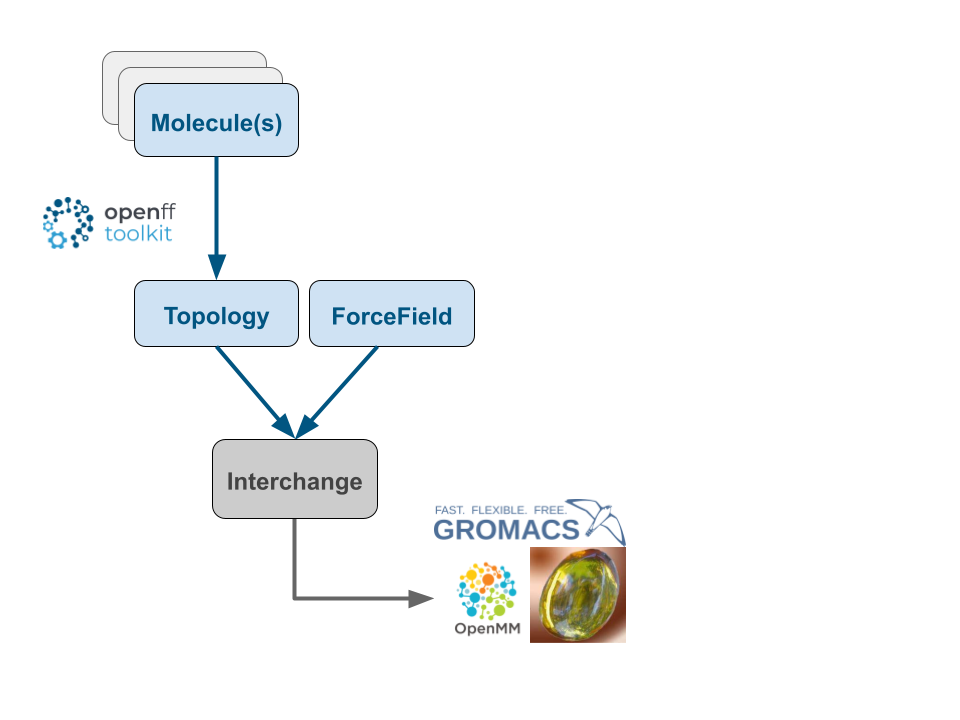

In [4]:
from IPython.display import Image

Image(filename="img/preview.png")